## Prueba 1
Integrantes:
- Bryan Castro
- Sebastián Tipán

Utilice el dataset titanic.xlsx, para clasificar o predecir qué pasajero va a sobrevivir. 

1. Actividades de preprocesamiento
    1. Analice los atributos y datos del dataset
        1. Saque estadísticas
        2. Genere gráficas
        3. Valores perdidos
        4. Son necesarios todos los atributos para aplicar los algoritmos
        5. Si va a eliminar algún atributo, justifíquelo
    2. Si encuentra valores perdidos o faltantes, deberían ser eliminados o sustituidos. Justifique su decisión.
2. Utilice el algoritmo de DecisionTreeClassifier y determine cuál de los 3 criterios es mejor en la clasificación, comparando el score de cada uno.
3. Para cada uno de los siguientes algoritmos de aprendizaje, calcule el score y determine el mejor modelo.
    - Logistic Regression
    - Random Forest Classification
    - Support Vector Machine (SVM)
    - Native bayes
    - Adaptive Boosting (AdaBoost)
    - Gradient Boosted Trees
    - Extreme Gradient Boosting (XGBoost)
    - K-Nearest Neighbors Classification(KNN)

In [51]:
# Importar librerias
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [52]:
#Leer archivo 
df = pd.read_excel('./Titanic.xlsx')
df.head()
print("Dimensiones:", df.shape)
display(df.head(10))

Dimensiones: (1309, 12)


c:\Users\Dev\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived
0,First,"Allen, Miss. Elisabeth Walton",Female,29.0000,0,0,24160,211.3375,B5,Southampton,2,Yes
1,First,"Allison, Master. Hudson Trevor",Male,0.9167,1,2,113781,151.5500,C22 C26,Southampton,11,Yes
2,First,"Allison, Miss. Helen Loraine",Female,2.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No
3,First,"Allison, Mr. Hudson Joshua Creighton",Male,30.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No
4,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No
5,First,"Anderson, Mr. Harry",Male,48.0000,0,0,19952,26.5500,E12,Southampton,3,Yes
6,First,"Andrews, Miss. Kornelia Theodosia",Female,63.0000,1,0,13502,77.9583,D7,Southampton,10,Yes
7,First,"Andrews, Mr. Thomas Jr",Male,39.0000,0,0,112050,0.0000,A36,Southampton,NaN,No
8,First,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",Female,53.0000,2,0,11769,51.4792,C101,Southampton,D,Yes
9,First,"Artagaveytia, Mr. Ramon",Male,71.0000,0,0,PC 17609,49.5042,NaN,Cherbourg,NaN,No


1. ``Saque estadísticas`` 

In [53]:
print("\nInformación general:")
display(df.info())


print("\nEstadísticas:")
display(df.describe())

print("\nValores únicos por columna:")
df.isnull().sum()
df.isnull().mean() * 100




Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Passenger Class                     1309 non-null   object 
 1   Name                                1309 non-null   object 
 2   Sex                                 1309 non-null   object 
 3   Age                                 1046 non-null   float64
 4   No of Siblings or Spouses on Board  1309 non-null   int64  
 5   No of Parents or Children on Board  1309 non-null   int64  
 6   Ticket Number                       1309 non-null   object 
 7   Passenger Fare                      1308 non-null   float64
 8   Cabin                               295 non-null    object 
 9   Port of Embarkation                 1307 non-null   object 
 10  Life Boat                           486 non-null    object 
 11  Survived             

None


Estadísticas:


,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Passenger Fare
count,1046.000000,1309.000000,1309.000000,1308.000000
mean,29.881135,0.498854,0.385027,33.295479
std,14.413500,1.041658,0.865560,51.758668
min,0.166700,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,14.454200
75%,39.000000,1.000000,0.000000,31.275000
max,80.000000,8.000000,9.000000,512.329200



Valores únicos por columna:


Passenger Class                        0.000000
Name                                   0.000000
Sex                                    0.000000
Age                                   20.091673
No of Siblings or Spouses on Board     0.000000
No of Parents or Children on Board     0.000000
Ticket Number                          0.000000
Passenger Fare                         0.076394
Cabin                                 77.463713
Port of Embarkation                    0.152788
Life Boat                             62.872422
Survived                               0.000000
dtype: float64

``Eliminación de Atributos inncesarios``
1. Name
    - No aporta en nada al análisis ya que es un dato que varia demasiado
2. Ticket Number
    - No aporta en nada, ya que es un datos único
3. Cabin
    - No sirve de nada ya que tiene mas de un 50% de datos faltantes
4. Life Boat 
    - No sirve de nada ya que tambien tiene mas de un 50% de datos faltantes

In [54]:
# Eliminación de columnas irrelevantes
df = df.drop(columns=['Name','Ticket Number', 'Cabin', 'Life Boat'])
df.head()

,Passenger Class,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Passenger Fare,Port of Embarkation,Survived
0,First,Female,29.0000,0,0,211.3375,Southampton,Yes
1,First,Male,0.9167,1,2,151.5500,Southampton,Yes
2,First,Female,2.0000,1,2,151.5500,Southampton,No
3,First,Male,30.0000,1,2,151.5500,Southampton,No
4,First,Female,25.0000,1,2,151.5500,Southampton,No


``Sustituir Valores perdidos``
1. Edad
    - Tomar la media de edad 
    - Rellenar los datos con la edad media
2. Port of embarkation
    - Transformar a indices Numéricos
3. Sex
    - Transformar a indices Numéricos
4. Passenger Fare
    - Hay un dato sin un valor, entonces le agregaremos la media


In [ ]:
# Calcular la media de edad
# Rellenar los datos faltantes en la columna 'Age' con la media calculada
media_age = np.floor(df['Age'].mean())
print("La media de edad es:", media_age)

df['Age'] = df['Age'].fillna(media_age)
df.head(25)

# Rellenar los datos faltantes en la columna 'Passenger Fare' con la media calculada
media_ps= np.floor(df['Passenger Fare'].mean())
df['Passenger Fare'] = df['Passenger Fare'].fillna(media_ps)
df['Port of Embarkation'].unique()

# Transformar a indices Numéricos Port of Embarkation
df['Port of Embarkation'] = df['Port of Embarkation'].map({'':0, 'Southampton': 1, 'Cherbourg': 2, 'Queenstown':3})
df['Port of Embarkation'] = df['Port of Embarkation'].fillna(0)
df['Port of Embarkation'].unique()

# Transformar a indices Numéricos el género
df['Sex'] = df['Sex'].map({'Male': 0, 'Female': 1})
df['Passenger Class'].unique()

# Transformar a indices Numéricos Passenger Class
df['Passenger Class'] = df['Passenger Class'].map({'First': 1, 'Second': 2, 'Third': 3})
df['Passenger Class'].unique()

# Transformar a indices Numéricos Survived
df['Survived'] = df['Survived'].map({'No': 0, 'Yes': 1})

La media de edad es: 29.0


2. ``Generación de Graficas`` 

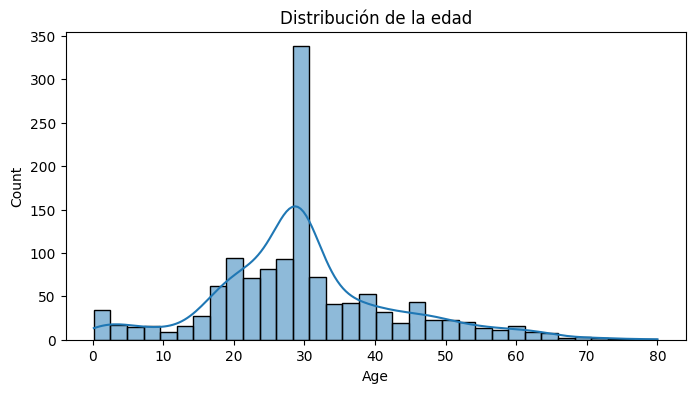

In [56]:
# Edad
plt.figure(figsize=(8,4))
sns.histplot(df['Age'].dropna().astype(float), kde=True)
plt.title('Distribución de la edad')
plt.show()

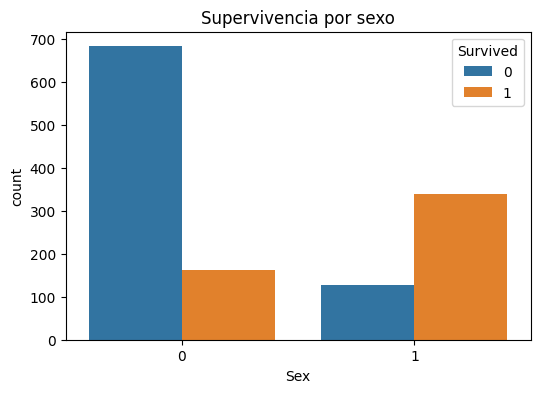

In [57]:
# Conteo de sobrevivientes por sexo
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Supervivencia por sexo')
plt.show()

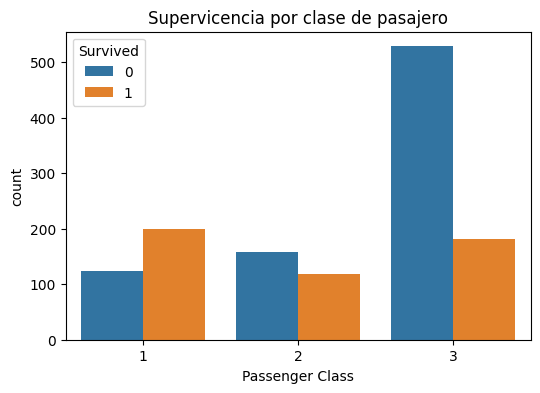

In [58]:
# Conteo de sobrevivientes por clase de pasajero
if 'Passenger Class' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='Passenger Class', hue='Survived', data=df)
    plt.title('Supervicencia por clase de pasajero')
    plt.show()

<Axes: xlabel='Sex', ylabel='count'>

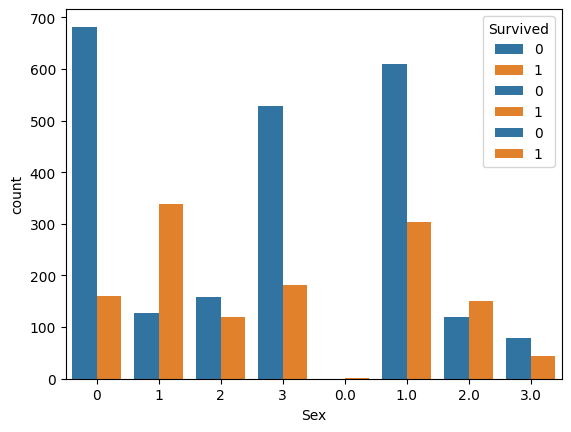

In [59]:
sns.countplot(x='Sex', hue='Survived', data=df)
sns.countplot(x='Passenger Class', hue='Survived', data=df)
sns.countplot(x='Port of Embarkation', hue='Survived', data=df)

## ``2. Utilice el algoritmo de DecisionTreeClassifier y determine cuál de los 3 criterios es mejor en la clasificación, comparando el score de cada uno.`` 


In [60]:
# Separamos variables independientes y dependientes
caracteristicas = df.columns[:-1].tolist()
x = df[caracteristicas].values
y = df['Survived']
print(df.isnull().sum())


Passenger Class                       0
Sex                                   0
Age                                   0
No of Siblings or Spouses on Board    0
No of Parents or Children on Board    0
Passenger Fare                        0
Port of Embarkation                   0
Survived                              0
dtype: int64


In [61]:
#Entrenar el modelo
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

#Modelo 1: Gini
modelo = DecisionTreeClassifier(criterion='gini', random_state=123)
modelo.fit(x_train, y_train)
score_gini = modelo.score(x_test, y_test)
print("Score con criterio Gini:", score_gini)

# Modelo 2: Entropía
modelo = DecisionTreeClassifier(criterion='entropy', random_state=123)
modelo.fit(x_train, y_train)
score_entropy = modelo.score(x_test, y_test)
print("Score con criterio Entropía:", score_entropy)

#Modelo 3: Log Loss
modelo = DecisionTreeClassifier(criterion='log_loss', random_state=123)
modelo.fit(x_train, y_train)
score_log_loss = modelo.score(x_test, y_test)
print("Score con criterio Log Loss:", score_log_loss)


Score con criterio Gini: 0.7938931297709924
Score con criterio Entropía: 0.7633587786259542
Score con criterio Log Loss: 0.7633587786259542


- Score con criterio Gini: 0.794
- Score con criterio Entropía: 0.763
- Score con criterio Log Loss: 0.763

``Interpretación:``
Gini es el criterio recomendado para este dataset usando el 80% de los datos para entrenameineto y el restante para pruebas, teniendo asi una mayor tasa de extito contra los otros 2 modelos


``Para cada uno de los siguientes algoritmos de aprendizaje, calcule el score y determine el mejor modelo``
- Logistic Regression
- Random Forest Classification
- Support Vector Machine (SVM)
- Native bayes
- Adaptive Boosting (AdaBoost)
- Gradient Boosted Trees
- Extreme Gradient Boosting (XGBoost)
- K-Nearest Neighbors Classification(KNN)

In [ ]:
# Importar librerías
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

# Definir cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 1 Logistic Regression
lr = LogisticRegression(max_iter=1000)
scores = cross_val_score(lr, x, y, cv=cv, scoring='accuracy')
print(f"Logistic Regression: Accuracy={scores.mean():.4f}, Std={scores.std():.4f}")

# 2️ Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(rf, x, y, cv=cv, scoring='accuracy')
print(f"Random Forest: Accuracy={scores.mean():.4f}, Std={scores.std():.4f}")

# 3️ Support Vector Machine (SVM)
svm = SVC(kernel='rbf', probability=True)
scores = cross_val_score(svm, x, y, cv=cv, scoring='accuracy')
print(f"SVM: Accuracy={scores.mean():.4f}, Std={scores.std():.4f}")

# 4️ Naive Bayes
nb = GaussianNB()
scores = cross_val_score(nb, x, y, cv=cv, scoring='accuracy')
print(f"Naive Bayes: Accuracy={scores.mean():.4f}, Std={scores.std():.4f}")

# 5️ AdaBoost
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(ada, x, y, cv=cv, scoring='accuracy')
print(f"AdaBoost: Accuracy={scores.mean():.4f}, Std={scores.std():.4f}")

# 6️ Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(gb, x, y, cv=cv, scoring='accuracy')
print(f"Gradient Boosting: Accuracy={scores.mean():.4f}, Std={scores.std():.4f}")

# 7️ XGBoost
xg = xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
scores = cross_val_score(xg, x, y, cv=cv, scoring='accuracy')
print(f"XGBoost: Accuracy={scores.mean():.4f}, Std={scores.std():.4f}")

# 8️ K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, x, y, cv=cv, scoring='accuracy')
print(f"KNN: Accuracy={scores.mean():.4f}, Std={scores.std():.4f}")


Logistic Regression: Accuracy=0.7922, Std=0.0165
Random Forest: Accuracy=0.7907, Std=0.0264
SVM: Accuracy=0.6715, Std=0.0223
Naive Bayes: Accuracy=0.7792, Std=0.0247
AdaBoost: Accuracy=0.7854, Std=0.0246
Gradient Boosting: Accuracy=0.8098, Std=0.0192


c:\Users\Dev\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:06:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Dev\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:06:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Dev\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:06:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Dev\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:06:55] WARNING: C:\actions-runne

XGBoost: Accuracy=0.8060, Std=0.0258
KNN: Accuracy=0.6898, Std=0.0130


## Interpretacion 
Para la seleccion del modelo se considero los resultados de Accuracy(Precisión) y STD(Desviacion estandar), de lo cual se obtuvieron lo siguientes valores para cada uno de los modelos:
- **Logistic Regression**: Accuracy=0.7922, Std=0.0165
- **Random Forest**: Accuracy=0.7907, Std=0.0264
- **SVM**: Accuracy=0.6715, Std=0.0223
- **Naive Bayes**: Accuracy=0.7792, Std=0.0247
- **AdaBoost**: Accuracy=0.7854, Std=0.0246
- **Gradient Boosting**: Accuracy=0.8098, Std=0.0192

Obteniendo que el mejor modelo es `Gradient Boosting` dado a que posee el mayor valor de precisión entre los modelos y a su vez su desviancion menor considerando el modelo que mas se le acerca en precision `Logistic Regression`.